In [1]:
#Imports
import pandas as pd
import os
import numpy as np
import re
from io import StringIO
import ipywidgets as widgets

import warnings
warnings.simplefilter('ignore')

In [2]:
from pathlib import Path
path = Path(os.path.abspath(""))

import sys
sys.path.append(str(path))

from split_data import split_data

In [3]:
path = r"D:\Emteq data\Bongiovi\Geneva collection" #if the files are placed in a different folder, specify the folder path here
#folders = [f for f in os.listdir(path) if "8" not in f and "10" not in f and "5" not in f and "9" not in f]
folders = ["P23", "P24", "P25"]
files = []
for folder in folders:
    files.extend([path+os.sep+folder+os.sep+f for f in os.listdir(path+os.sep+folder) if ".csv" in f and "T" in f])
files

['D:\\Emteq data\\Bongiovi\\Geneva collection\\P23\\2022-06-20T09-24-47.csv',
 'D:\\Emteq data\\Bongiovi\\Geneva collection\\P24\\2022-06-20T10-19-29.csv',
 'D:\\Emteq data\\Bongiovi\\Geneva collection\\P25\\2022-06-20T11-21-32.csv']

In [4]:
#split_data(files[0], files[0][:-3]+"json")

In [5]:
for file in files:
    split_data(file, file[:-3]+"json")

1655710101.615 <class 'float'>
1655713392.954 <class 'float'>
1655717077.834 <class 'float'>


### Adding supervision stuff to it

In [6]:
supervision_path = r"D:\Emteq\EmteqScripts\Supervision stuff\gopro-data-inferance"
sys.path.append(supervision_path)

In [7]:
from hrv.pipeline import pipeline as hrv_pipeline
from valence.pipeline import pipeline as valence_pipeline
from arousal.pipeline import pipeline as arousal_pipeline
from breathingRate.pipeline import pipeline as breathingRate_pipeline
from expression.pipeline import pipeline as expression_pipeline
from facialValence.pipeline import pipeline as facialValence_pipeline
from facialActivation.pipeline import pipeline as facialActivation_pipeline

#### Getting all the insights for the main experience file

P23
hrv
arousal
valence
expression
breathingRate
facialActivation
facialValence
P24
hrv
arousal
valence
expression
breathingRate
facialActivation
facialValence
P25
hrv
arousal
valence
expression
breathingRate
facialActivation
facialValence


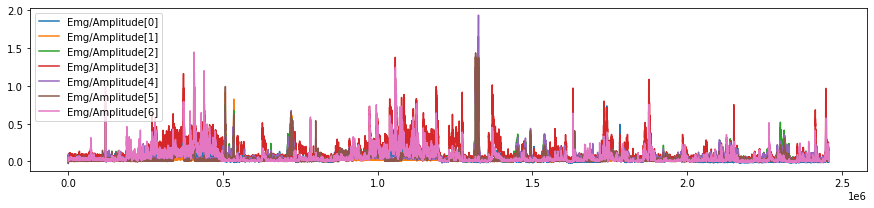

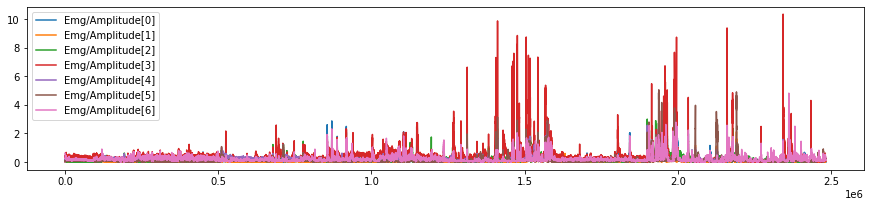

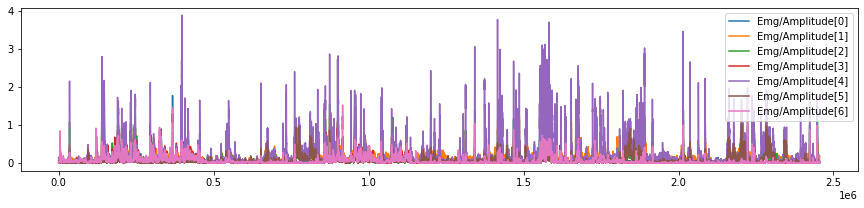

In [9]:
for folder in folders:
    tmp_path = path+os.sep+folder+os.sep
    os.mkdir(tmp_path+"result")
    cali_file = tmp_path+"calibration_file.csv"
    xp_file = tmp_path+"experience_file.csv"
    print(folder)
    hrv_tmp = hrv_pipeline(input_data=xp_file, path_to_event_markers="",
                           sampling_rate=50, win_size=30, win_slide=10, win_si=2, win_sl=2, threshold=1.37)
    hrv_tmp.to_csv(tmp_path+"result"+os.sep+folder+"_hrv.csv")
    print("hrv")
    
    arousal_tmp = arousal_pipeline(input_data=xp_file, calibration_data=cali_file, path_to_event_markers="", path_to_models=supervision_path+r"\arousal", 
                      path_to_scalers="scalers", sampling_rate=50, win_size=30, win_slide=10, win_si=2, win_sl=2, threshold=1.37)
    arousal_tmp.to_csv(tmp_path+"result"+os.sep+folder+"_arousal.csv")
    print("arousal")
    
    valence_tmp = valence_pipeline(input_data=xp_file, calibration_data=cali_file, path_to_event_markers="", path_to_models=supervision_path+r"\valence", 
                      path_to_scalers="scalers", sampling_rate=50, win_size=30, win_slide=10, win_si=2, win_sl=2, threshold=1.37)
    valence_tmp.to_csv(tmp_path+"result"+os.sep+folder+"_valence.csv")
    print("valence")
    
    expression_tmp = expression_pipeline(input_data=xp_file, calibration_data=cali_file, path_to_event_markers="", 
                                         path_to_models=supervision_path+r"\expression", sampling_rate=1000, win_size=0.5, win_slide=0.1)
    expression_tmp.to_csv(tmp_path+"result"+os.sep+folder+"_expression.csv")
    print("expression")
    
    breathingRate_tmp = breathingRate_pipeline(input_data=xp_file, path_to_event_markers="", path_to_models=supervision_path+r"\breathingRate",
                                               sampling_rate=50, win_size=24, win_slide=1)
    breathingRate_tmp.to_csv(tmp_path+"result"+os.sep+folder+"_breathingRate.csv")
    print("breathingRate")
    
    facialActivation_tmp = facialActivation_pipeline(input_data=xp_file, calibration_data=cali_file, path_to_event_markers="", path_to_models=None, path_to_scalers=None,
                                                    sampling_rate=1000, win_size=0.5, win_slide=0.5, win_si=None, win_sl=None, threshold=None)
    facialActivation_tmp.to_csv(tmp_path+"result"+os.sep+folder+"_facialActivation.csv")
    print("facialActivation")
    
    facialValence_tmp = facialValence_pipeline(input_data=xp_file, calibration_data=cali_file, path_to_event_markers="", path_to_models=None, path_to_scalers=None,
                                                    sampling_rate=1000, win_size=0.5, win_slide=0.5, win_si=None, win_sl=None, threshold=None)
    facialValence_tmp.to_csv(tmp_path+"result"+os.sep+folder+"_facialValence.csv")
    print("facialValence")
    

In [13]:
def importdataCSV2DF(filename_csv): 
    '''
    """ The function reads the .csv file from a specified path and 
    formats the data into the required structure for further processing.
     
    Parameters
    ----------
    filename_csv : str
        Path to where the .csv file is stored. 
     
    Returns
    -------
    df : pandas.DataFrame
        Formatted dataframe containing the sensors data.
    """
    '''
    
    import re
    import pandas as pd
    import numpy as np
    from io import StringIO

    _file = open(filename_csv, 'r')
    data = _file.read()
    _file.close()

    magnetometer_divisor = 1  
    metadata = [line for line in data.split('\n') if '#' in line]
    for line in metadata:
        if line.find('Frame#') == -1:
            data=data.replace("{}".format(line),'', 1)
        if line.find('#Time/Seconds.referenceOffset') != -1:
            time_offset = float(line.split(',')[1])
        if line.find('#Emg/Properties.rawToVoltageDivisor') != -1:
            emg_divisor = float(line.split(',')[1])
        if line.find('#Emg/Properties.contactToImpedanceDivisor') != -1:
            impedance_divisor = float(line.split(',')[1])
        if line.find('#Imu/Properties.accelerationDivisor') != -1 or line.find('#Accelerometer/Properties.rawDivisor') != -1:
            acceleration_divisor = float(line.split(',')[1])
        if line.find('#Imu/Properties.magnetometerDivisor') != -1 or line.find('#Magnetometer/Properties.rawDivisor') != -1:
            magnetometer_divisor = float(line.split(',')[1])
        if line.find('#Imu/Properties.gyroscopeDivisor') != -1 or line.find('#Gyroscope/Properties.rawDivisor') != -1:
            gyroscope_divisor = float(line.split(',')[1])
    data = re.sub(r'\n\s*\n', '\n', data, re.MULTILINE)
    data = re.sub(r'\s*\n\s*Frame#','Frame#', data, re.MULTILINE)

    df = pd.read_csv(StringIO(data), skip_blank_lines=True, delimiter = ',', na_filter=False, low_memory=False)
    df = df.replace('', np.nan)
    #df = df.dropna()

    #convert raw values to appropriate unit
    if "Emg/Contact[RightOrbicularis]" in df.columns:  # check the version if the EMG sensor names are with names or numbers 
        df[['Emg/Amplitude[RightOrbicularis]', 'Emg/Amplitude[RightZygomaticus]','Emg/Amplitude[RightFrontalis]','Emg/Amplitude[CenterCorrugator]','Emg/Amplitude[LeftFrontalis]','Emg/Amplitude[LeftZygomaticus]','Emg/Amplitude[LeftOrbicularis]']] = df[['Emg/Amplitude[RightOrbicularis]', 'Emg/Amplitude[RightZygomaticus]','Emg/Amplitude[RightFrontalis]','Emg/Amplitude[CenterCorrugator]','Emg/Amplitude[LeftFrontalis]','Emg/Amplitude[LeftZygomaticus]','Emg/Amplitude[LeftOrbicularis]']].astype('float') / emg_divisor
        df[['Emg/Filtered[RightOrbicularis]', 'Emg/Filtered[RightZygomaticus]', 'Emg/Filtered[RightFrontalis]','Emg/Filtered[CenterCorrugator]','Emg/Filtered[LeftFrontalis]','Emg/Filtered[LeftZygomaticus]','Emg/Filtered[LeftOrbicularis]']] = df[['Emg/Filtered[RightOrbicularis]', 'Emg/Filtered[RightZygomaticus]', 'Emg/Filtered[RightFrontalis]','Emg/Filtered[CenterCorrugator]','Emg/Filtered[LeftFrontalis]','Emg/Filtered[LeftZygomaticus]','Emg/Filtered[LeftOrbicularis]']].astype('float') / emg_divisor
        df[['Emg/Raw[RightOrbicularis]','Emg/Raw[RightZygomaticus]','Emg/Raw[RightFrontalis]','Emg/Raw[CenterCorrugator]','Emg/Raw[LeftFrontalis]','Emg/Raw[LeftZygomaticus]','Emg/Raw[LeftOrbicularis]']] = df[['Emg/Raw[RightOrbicularis]','Emg/Raw[RightZygomaticus]','Emg/Raw[RightFrontalis]','Emg/Raw[CenterCorrugator]','Emg/Raw[LeftFrontalis]','Emg/Raw[LeftZygomaticus]','Emg/Raw[LeftOrbicularis]']].astype('float') / emg_divisor
        df[['Emg/Contact[RightOrbicularis]', 'Emg/Contact[RightZygomaticus]','Emg/Contact[RightFrontalis]','Emg/Contact[CenterCorrugator]','Emg/Contact[LeftFrontalis]','Emg/Contact[LeftZygomaticus]','Emg/Contact[LeftOrbicularis]']] = df[['Emg/Contact[RightOrbicularis]', 'Emg/Contact[RightZygomaticus]','Emg/Contact[RightFrontalis]','Emg/Contact[CenterCorrugator]','Emg/Contact[LeftFrontalis]','Emg/Contact[LeftZygomaticus]','Emg/Contact[LeftOrbicularis]']].astype('float') / impedance_divisor
        df[['Accelerometer/Raw.x','Accelerometer/Raw.y','Accelerometer/Raw.z']] = df[['Accelerometer/Raw.x','Accelerometer/Raw.y','Accelerometer/Raw.z']].astype('float') / acceleration_divisor
        df[['Magnetometer/Raw.x', 'Magnetometer/Raw.y','Magnetometer/Raw.z']] = df[['Magnetometer/Raw.x', 'Magnetometer/Raw.y','Magnetometer/Raw.z']].astype('float') / magnetometer_divisor
        df[['Gyroscope/Raw.x', 'Gyroscope/Raw.y', 'Gyroscope/Raw.z']] = df[['Gyroscope/Raw.x', 'Gyroscope/Raw.y', 'Gyroscope/Raw.z']].astype('float') / gyroscope_divisor

    else:
        df[['Emg/Amplitude[0]', 'Emg/Amplitude[1]','Emg/Amplitude[2]','Emg/Amplitude[3]','Emg/Amplitude[4]','Emg/Amplitude[5]','Emg/Amplitude[6]']] = df[['Emg/Amplitude[0]', 'Emg/Amplitude[1]','Emg/Amplitude[2]','Emg/Amplitude[3]','Emg/Amplitude[4]','Emg/Amplitude[5]','Emg/Amplitude[6]']].astype('float') / emg_divisor
        df[['Emg/Filtered[0]', 'Emg/Filtered[1]', 'Emg/Filtered[2]','Emg/Filtered[3]','Emg/Filtered[4]','Emg/Filtered[5]','Emg/Filtered[6]']] = df[['Emg/Filtered[0]', 'Emg/Filtered[1]', 'Emg/Filtered[2]','Emg/Filtered[3]','Emg/Filtered[4]','Emg/Filtered[5]','Emg/Filtered[6]']].astype('float') / emg_divisor
        df[['Emg/Raw[0]','Emg/Raw[1]','Emg/Raw[2]','Emg/Raw[3]','Emg/Raw[4]','Emg/Raw[5]','Emg/Raw[6]']] = df[['Emg/Raw[0]','Emg/Raw[1]','Emg/Raw[2]','Emg/Raw[3]','Emg/Raw[4]','Emg/Raw[5]','Emg/Raw[6]']].astype('float') / emg_divisor
        df[['Emg/Contact[0]', 'Emg/Contact[1]','Emg/Contact[2]','Emg/Contact[3]','Emg/Contact[4]','Emg/Contact[5]','Emg/Contact[6]']] = df[['Emg/Contact[0]', 'Emg/Contact[1]','Emg/Contact[2]','Emg/Contact[3]','Emg/Contact[4]','Emg/Contact[5]','Emg/Contact[6]']].astype('float') / impedance_divisor
        df[['Imu/Accelerometer.x','Imu/Accelerometer.y','Imu/Accelerometer.z']] = df[['Imu/Accelerometer.x','Imu/Accelerometer.y','Imu/Accelerometer.z']].astype('float') / acceleration_divisor
        df[['Imu/Magnetometer.x', 'Imu/Magnetometer.y','Imu/Magnetometer.z']] = df[['Imu/Magnetometer.x', 'Imu/Magnetometer.y','Imu/Magnetometer.z']].astype('float') / magnetometer_divisor
        df[['Imu/Gyroscope.x', 'Imu/Gyroscope.y', 'Imu/Gyroscope.z']] = df[['Imu/Gyroscope.x', 'Imu/Gyroscope.y', 'Imu/Gyroscope.z']].astype('float') / gyroscope_divisor

    df[['HeartRate/Average']] = df[['HeartRate/Average']].astype('float') 

    #calculate unix timestamps
    unix_timestamps = time_offset + 946684800
    unix_timestamps = df['Time'].astype('float') + unix_timestamps 
    #df.insert(loc=2, column='UnixTime', value=unix_timestamps)
    
    return df

In [14]:
x = importdataCSV2DF("D:\Emteq data\Bongiovi\Geneva collection\P2\experience_file.csv")

In [15]:
x

,Frame#,Time,Faceplate/FaceState,Faceplate/FitState,Emg/ContactStates[RightOrbicularis],Emg/Contact[RightOrbicularis],Emg/Raw[RightOrbicularis],Emg/RawLift[RightOrbicularis],Emg/Filtered[RightOrbicularis],Emg/Amplitude[RightOrbicularis],...,Accelerometer/Raw.x,Accelerometer/Raw.y,Accelerometer/Raw.z,Magnetometer/Raw.x,Magnetometer/Raw.y,Magnetometer/Raw.z,Gyroscope/Raw.x,Gyroscope/Raw.y,Gyroscope/Raw.z,Pressure/Raw
0,3669,"1,655,305,282.39",1,8,255,"13,388.00",-0.02,0,0.00,0.00,...,9.80,-0.64,-0.28,0.00,0.00,0.00,-0.12,0.00,0.82,9722645
1,3670,"1,655,305,282.39",1,8,255,"13,388.00",-0.02,0,-0.00,0.00,...,9.80,-0.64,-0.28,0.00,0.00,0.00,-0.12,0.00,0.82,9722645
2,3671,"1,655,305,282.39",1,8,255,"13,388.00",-0.02,0,-0.00,0.00,...,9.80,-0.64,-0.28,0.00,0.00,0.00,-0.12,0.00,0.82,9722645
3,3672,"1,655,305,282.39",1,8,255,"13,388.00",-0.02,0,-0.00,0.00,...,9.80,-0.64,-0.28,0.00,0.00,0.00,-0.12,0.00,0.82,9722645
4,3673,"1,655,305,282.40",1,8,255,"13,388.00",-0.02,0,0.00,0.00,...,9.80,-0.64,-0.28,0.00,0.00,0.00,-0.12,0.00,0.82,9722645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283813,2346105,"1,655,307,624.88",1,9,255,"11,062.00",-0.01,0,-0.00,0.00,...,9.32,-1.67,2.63,0.00,0.00,0.00,-1.07,9.22,2.50,9721994
2283814,2346106,"1,655,307,624.88",1,9,255,"11,062.00",-0.01,0,0.00,0.00,...,9.32,-1.67,2.63,0.00,0.00,0.00,-1.07,9.22,2.50,9721994
2283815,2346107,"1,655,307,624.88",1,9,255,"11,062.00",-0.01,0,0.00,0.00,...,9.32,-1.67,2.63,0.00,0.00,0.00,-1.07,9.22,2.50,9721994
2283816,2346108,"1,655,307,624.88",1,9,255,"11,062.00",-0.01,0,0.00,0.00,...,9.32,-1.67,2.63,0.00,0.00,0.00,-1.07,9.22,2.50,9721994


In [21]:
y = importdataCSV2DF("D:\Emteq data\Bongiovi\Geneva collection\P2\calibration_file.csv")